<a href="https://colab.research.google.com/github/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/blob/main/Aprendizado-de-maquina/ELT574_119826_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proposta

Utilizando o algoritmo K-means, encontre o número ideal de clusters para agrupar as amostras do banco de dados de músicas do Spotify "musicas_spotify_limpo.csv". Dica: utilize a curva de cotovelo para encontrar o intervalo com melhores ks e o diagrama de silhueta para definir o melhor modelo.

Sobre o banco de dados do Spotify, temos as seguintes informações:
* danceability: Descreve o quão adequada uma faixa é para dançar, baseado em uma combinação de elementos musicais como tempo, ritmo, batida etc. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.
* energy: Medida de 0 a 1 e representa uma medida perceptual de intensidade e atividade. Faixas energéticas parecem rápidas, altas e barulhentas. Características perceptuais que contribuem para esse atributo incluem a faixa dinâmica, a percepção de volume, o timbre, a taxa de início e a entropia geral.
* loudness: O volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa. Os valores normalmente variam entre -60  0 dB.
* tempo: o valor geral do tempo estimado de uma faixa em batidas por minuto (BPM). Em terminologia musical, tempo é a velocidade ou ritmo de uma peça musical e deriva diretamente da duração média da batida.
* valence: Uma medida de 0.0 a 1.0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, felizes, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, irritadas).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
PATH = 'https://raw.githubusercontent.com/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/refs/heads/main/Aprendizado-de-maquina/dados/musicas_spotify_limpo2.csv'
dados = pd.read_csv(PATH)

In [3]:
dados.head()

,danceability,energy,loudness,tempo,valence
0,0.786,0.667,-8.272,102.046,0.688
1,0.571,0.739,-11.163,93.105,0.818
2,0.286,0.929,-8.494,99.762,0.127
3,0.725,0.607,-7.486,129.971,0.570
4,0.184,0.161,-18.261,86.351,0.087


## Verificando valores nulos e outliers

In [4]:
dados.isnull().sum()

,0
danceability,0
energy,0
loudness,0
tempo,0
valence,0


In [5]:
dados.describe()

,danceability,energy,loudness,tempo,valence
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.561148,0.635062,-8.069284,120.699930,0.488802
std,0.178634,0.242053,4.429160,31.233957,0.257159
min,0.109000,0.003770,-40.046000,63.047000,0.035900
25%,0.438750,0.487000,-9.510000,94.986750,0.279000
50%,0.579500,0.680000,-6.834500,115.235000,0.477500
75%,0.694250,0.830500,-5.206500,141.933250,0.696250
max,0.936000,0.997000,-2.228000,200.082000,0.973000


In [6]:
def plot_boxplots(df, coluna):

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[coluna])
    plt.xticks(rotation=45)
    plt.title("Boxplots das Variáveis Numéricas")
    plt.show()

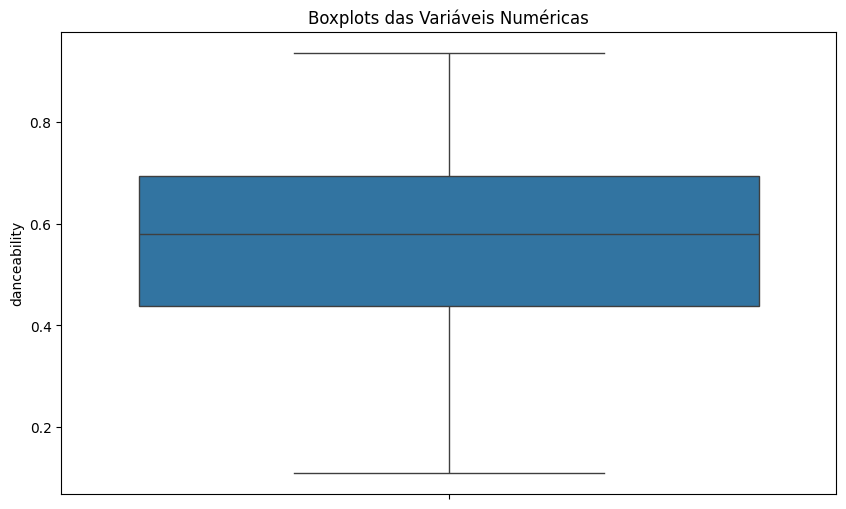

In [7]:
plot_boxplots(dados, 'danceability')

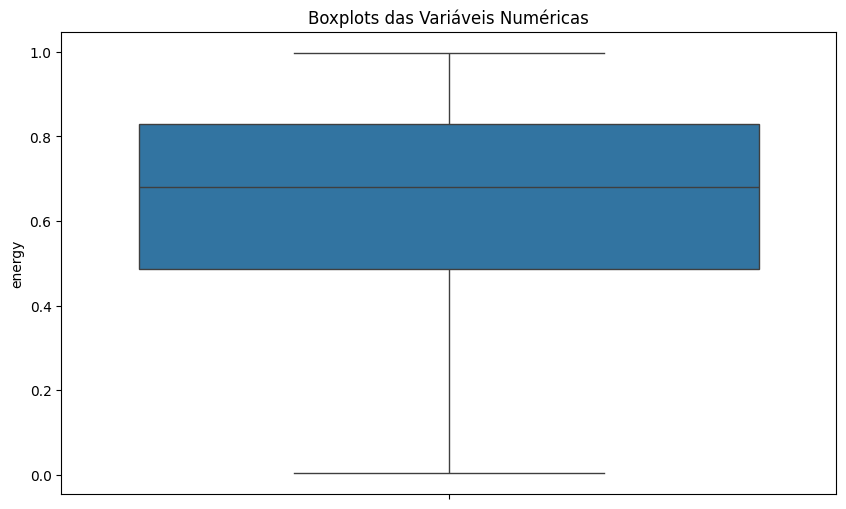

In [8]:
plot_boxplots(dados, 'energy')

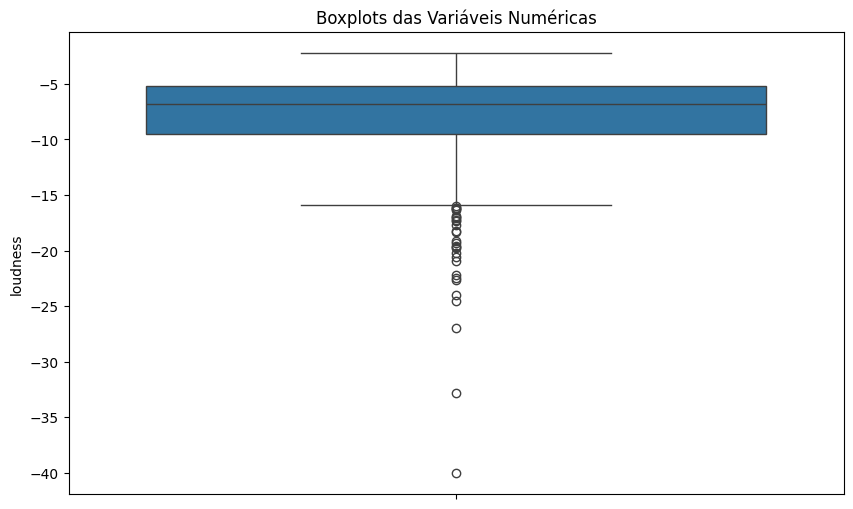

In [9]:
plot_boxplots(dados, 'loudness')

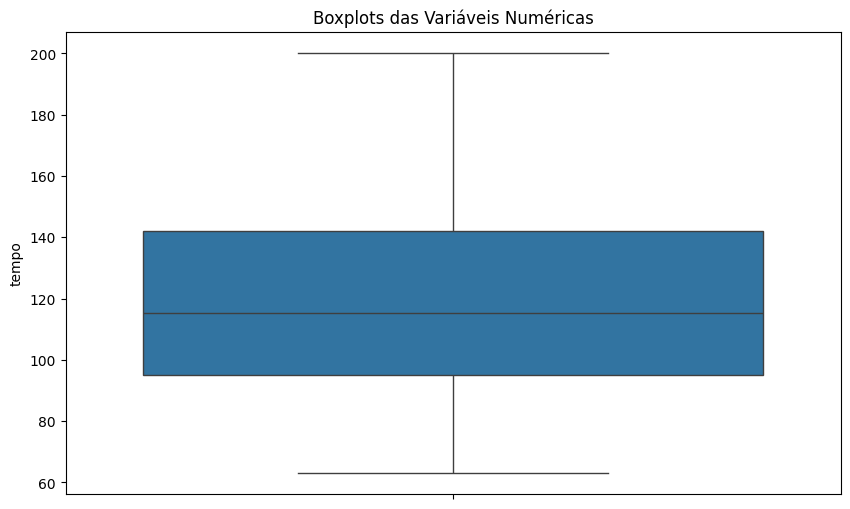

In [10]:
plot_boxplots(dados, 'tempo')

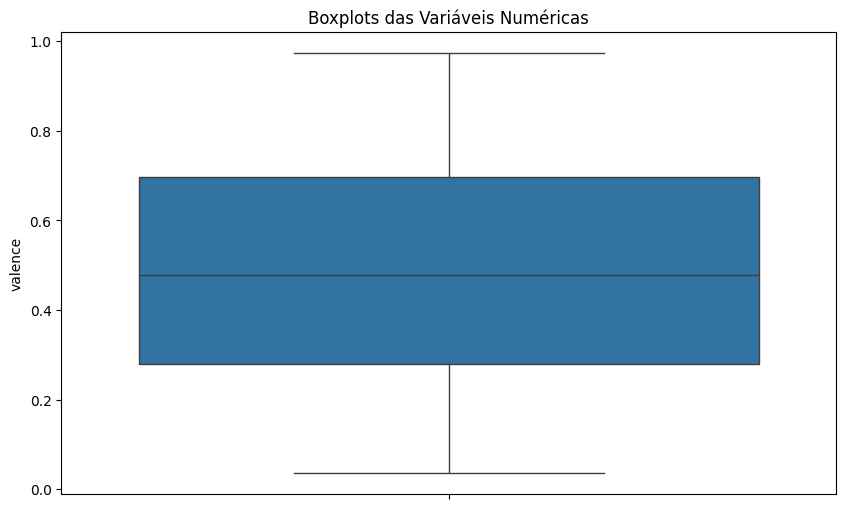

In [11]:
plot_boxplots(dados, 'valence')

Os boxplots aima tem um bom comportamento, a nao ser pela variavel 'loudness' que tem a presenca de outliers

In [12]:
dados[dados['loudness']  < -15].shape[0]


36

Para a remocao dos outliers, vamos usar IQR.

In [13]:
def remove_outliers(dados, coluna):

    Q1 = dados[coluna].quantile(0.25)
    Q3 = dados[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dados[(dados[coluna] >= lower_bound) & (dados[coluna] <= upper_bound)]

In [14]:
dados_sem_outliers = remove_outliers(dados, 'loudness')
dados_sem_outliers['loudness'].describe()

,loudness
count,471.000000
mean,-7.301450
std,2.993746
min,-15.894000
25%,-8.925000
50%,-6.692000
75%,-5.157000
max,-2.228000


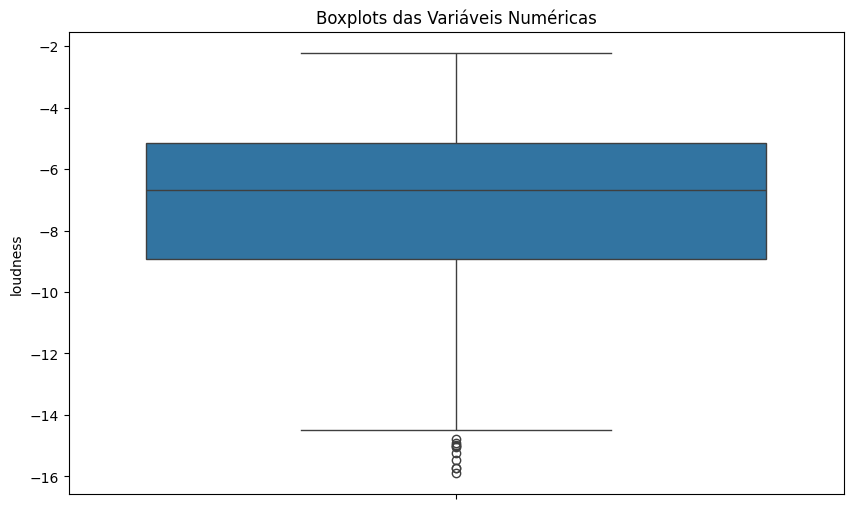

In [15]:
plot_boxplots(dados_sem_outliers, 'loudness')

## Modelo

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [17]:
X = dados_sem_outliers[:-3]
predizer = dados_sem_outliers.tail(3)
X.shape, predizer.shape

((468, 5), (3, 5))

Separei os 3 ultimos regsitros para posteriormente podermos usar nosso algoritmo treinado.

In [18]:
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

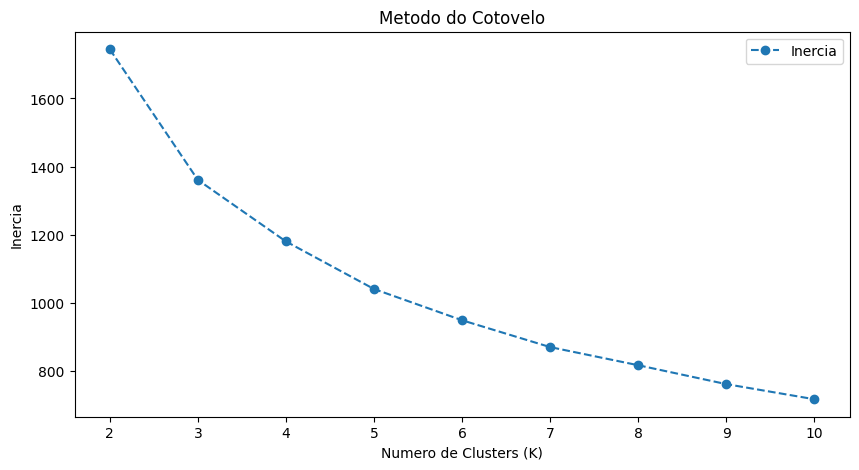

In [19]:
cotovelos = []

Ks = range(2, 11)
for k in Ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_normalizado)

    cotovelos.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(Ks, cotovelos, marker='o', linestyle='--', label="Inercia")
plt.xlabel("Numero de Clusters (K)")
plt.ylabel("Inercia")
plt.title("Metodo do Cotovelo")
plt.legend()
plt.show()


Visualmente os melhores valores sao, o 4 e 5 clusters.

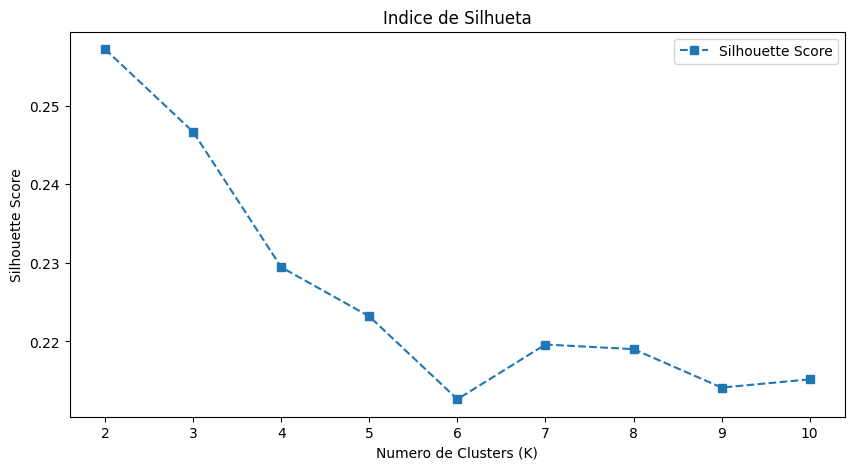

In [20]:
silhouette_scores = []

Ks = range(2, 11)
for k in Ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_normalizado)

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_normalizado, labels))


plt.figure(figsize=(10,5))
plt.plot(Ks, silhouette_scores, marker='s', linestyle='--', label="Silhouette Score")
plt.xlabel("Numero de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Indice de Silhueta")
plt.legend()
plt.show()

A aprir deste grafico, nos parece que o kmeans com 4 clusters nos performa melhor.

In [21]:
kmeans_prever = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_prever.fit(X_normalizado)

KMeans(n_clusters=4, n_init=10, random_state=42)

## Usando o  modelo

In [22]:
predizer_normalizado = scaler.fit_transform(predizer)
kmeans_prever.predict(predizer_normalizado)

array([0, 1, 2], dtype=int32)

## Visualizando os clusters com PCA

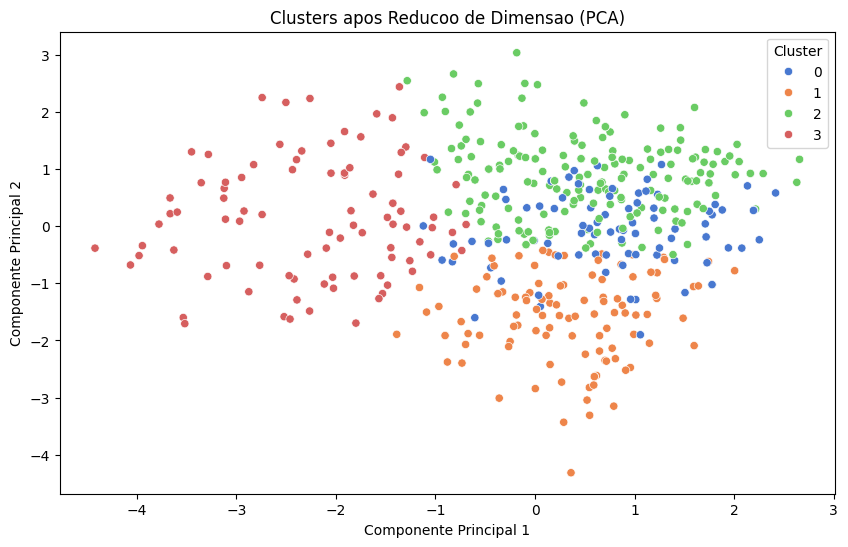

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalizado)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_prever.labels_, palette="muted")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters apos Reducoo de Dimensao (PCA)")
plt.legend(title="Cluster")
plt.show()
